# PARTIE - 0 : Chargement librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# PARTIE - 1 : Chargement des données

In [2]:
#data_0 = pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='\t', encoding='UTF-8', low_memory=False)

I can't load the file since my laptop doesn't possess enough memory (file is almost 4.3 gb)

ParserError: Error tokenizing data. C error: out of memory

In [3]:
# pour voir toute la colonne commentaire
pd.set_option('max_colwidth', 30)
# pour voir toutes les colonnes
pd.set_option('max_columns', None)
#pour voir plein de lignes
pd.options.display.max_rows = 3665

#### Version tronquée

In [4]:
# startpd = time.time()
# data_0 = pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='\t', encoding='UTF-8', nrows=200000, low_memory=False)
# endcon = time.time()
# print("total time: ",(endcon-startpd),"sec")
# data_0.head(2)

#### dask doesn't work since we have multiple type in columns !!

#### Version full lourde pour mon pc (besoin d'un écrémage rapide)

In [5]:
startpd = time.time()
chunk = pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='\t', encoding='UTF-8', chunksize=1000)
endpd = time.time()
data_0 = pd.concat(chunk)
endcon = time.time()
print("Read csv with chunks: ",(endpd-startpd),"sec")
print("concat csv with chunks: ",(endcon - endpd),"sec")
print("total time: ",(endcon - endpd),"sec")
data_0.head()

Read csv with chunks:  0.010993719100952148 sec
concat csv with chunks:  159.56285572052002 sec
total time:  159.56285572052002 sec


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,225,http://world-en.openfoodfa...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
data_0.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.918228e+06,1.918228e+06,0.0,0.0,4.871640e+05,0.0,709474.000000,0.0,709474.000000,0.0,709474.000000,0.0,701464.000000,619772.000000,462847.000000,1.378130e+05,1.471751e+06,1.523776e+06,972.000000,1.515847e+06,1.473002e+06,32.000000,6.000000e+00,7.000000e+00,11.000000,22.000000,1.600000e+01,33.000000,16.000000,108.000000,41.000000,14.000000,16.000000,2.200000e+01,17.000000,47882.000000,47845.000000,2048.000000,759.000000,123.000000,221.000000,542.000000,481.000000,127.000000,17.000000,12.000000,109.000000,67.000000,2.000000,45.000000,17.000000,9.000000e+00,1.500000e+01,264828.000000,268785.000000,1.515433e+06,1.499582e+06,165.000000,98.000000,80.000000,874.000000,69.000000,172.000000,524.000000,3670.000000,483856.000000,3610.000000,3339.000000,1.517055e+06,5.600000e+01,66.000000,44.000000,1.443021e+06,1.443018e+06,2.189300e+04,212558.000000,82.000000,9911.000000,3586.000000,1231.000000,220279.000000,23731.000000,22790.000000,23850.000000,16099.000000,10345.000000,8476.000000,1.289700e+04,1195.000000,6180.000000,155.000000,426.000000,92169.000000,799.000000,270587.000000,13925.000000,265021.000000,14812.000000,10277.000000,4331.000000,4094.000000,391.000000,2550.000000,210.000000,312.000000,2292.000000,479.000000,200.000000,201.000000,8793.000000,374.000000,11830.000000,314.000000,6136.000000,5.000000,476.000000,11741.000000,701468.000000,8.000000,4.000000,1.0,62.000000,1712.000000,37.000000,68.000000,39.000000
mean,1.557438e+09,1.592423e+09,NaN,NaN,2.280783e+16,NaN,2.036724,NaN,0.020476,NaN,0.070506,NaN,9.119673,3.428216,43.889231,4.836669e+37,5.967699e+06,4.374369e+36,350.844753,1.382302e+01,5.105976e+00,0.149640,8.065008e+00,1.848760e+01,4.721909,27.323495,1.919943e+01,81.011995,32.234900,17.107114,6.062969,26.51

# PARTIE - 2 : Description des données

Generalities:

- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

## List of fields :

001. code <br> barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
002. product_name : name of the product
003. quantity : quantity and unit
004. url : url of the product page on Open Food Facts <br> 
005. creator : contributor who first added the product <br> 
006. created_t : date that the product was added (UNIX timestamp format) <br> 
007. created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ) <br> 
008. last_modified_t : date that the product page was last modified <br> 
009. last_modified_datetime : date that the product was lastly modified (UNIX timestamp format) <br> 
010. product_name : name of the product <br> 
011. abbreviated_product_name <br> 
012. generic_name : generic name of the product <br> 
013. quantity : en g/l/capsules... ou no unit <br> 
014. packaging : type --> shape, material : plastique / bocal etc... <br> 
015. packaging_tags : same que packaging avec des tirets à la place des espaces <br> 
016. packaging_text : '1 Pot en verre à recycler', ..., '1 PET packet' <br> 
017. brands : 'courte paille', ..., 'miellerie de la natouze', 'Biocoop Bordeaux lac' <br> 
018. brands_tags : same stuff que 'brands' avec le tiret <br> 
019. categories : 'Epicerie, Condiments, Sauces, Moutardes <br> 
020. categories_tags : en:groceries,en:condiments,en:sauces,en:mustards', 'fr:xsf (same que categories) <br> 
021. categories_en : 'Groceries,Condiments,Sauces,Mustards', 'fr:xsf', ... <br> 
022. origins : origins of ingredients : 'France', 'Québec', ..., 'Saint-Jans-Cappel,Nord,France' <br> 
023. origins_tags : 'en:france', 'fr:quebec', ..., 'en:france,fr:nord,fr:saint-jans-cappel'<br> 
024. origins_en : 'France', 'fr:quebec', ..., 'France,fr:nord,fr:saint-jans-cappel', <br> 
025. manufacturing_places : places where manufactured or transformed --> bénivay-ollon', 'France', ..., 'maulévrier', 'sorbiers', 'Meppen,Deutschland' <br> 
026. manufacturing_places_tags : avec les tirets <br> 
027. labels : 'Delois france', 'Fabriqué en France', ..., '1702', 'No lactose <br> 
028. labels_tags : ... <br> 
029. labels_en : ... <br> 
030. emb_codes : Code emballeur complété 'FR 72.264.002 EC', 'FR 56.017.001 EC', ..., '04/f04001152/003' <br> 
031. emb_codes_tags :  <br> 
032. first_packaging_code_geo : coordinates corresponding to the first packaging code indicated 47.833333,-0.333333' <br> 
033. cities : villes <br> 
034. cities_tags : 'sable-sur-sarthe-sarthe-france' <br> 
035. purchase_places : place d'achat : 'France', 'Roissy,France', ..., '170DA', 'France,La Rochelle,Niort'<br> 
036. stores : magasins : 'courte paille', 'Marks & Spencer', ... <br> 
037. countries : list of countries where the product is sold : 'en:france', 'France', 'Espagne', <br> 
038. countries_tags : ... <br> 
039. countries_en : ... <br> 
040. ingredients_text : description des ingrédients avec pourcent ou pas <br> 
041. allergens : 'en:mustard', 'en:eggs,en:mustard', ..., 'fr:Gs1:T4078:AI,fr:Gs1:T4078:BA <br> 
042. allergens_en : ... <br> 
043. traces : 'fr:Fruits à coques et/ou cacahuètes' <br> 
044. traces_tags : ... <br> 
045. traces_en : ... <br> 
046. serving_size : serving size in g et des bêtises ! <br> 
047. serving_quantity : nan, 2.80000000e+01, 3.50000000e+01 <br> 
048. no_nutriments : indicates if the nutrition facts are indicated on the food label <br> 
049. additives_n : number of food additives ---> 49 wth ? <br> 
050. additives : empty... <br> 
051. additives_tags : 'en:e150,en:e160a,en:e202 <br> 
052. additives_en : ... <br> 
053. ingredients_from_palm_oil_n : in number from nan, 0 to 5 <br> 
054. ingredients_from_palm_oil : vide <br> 
055. ingredients_from_palm_oil_tags : 'stearine-de-palme,oleine-de-palme,'e304-palmitate-d-ascorbyle' <br> 
056. ingredients_that_may_be_from_palm_oil_n : number <br> 
057. ingredients_that_may_be_from_palm_oil <br> 
058. ingredients_that_may_be_from_palm_oil_tags <br> 
059. nutriscore_score : nan,  18.,   1.,  14.,  -2. <br> 
060. nutriscore_grade : nan, 'd', 'b', 'a', 'c', 'e' https://fr.openfoodfacts.org/nutriscore <br> 
061. nova_group : Une classification en 4 groupes pour mettre en évidence le degré de transformation des aliments nan, 1 à 4 https://fr.openfoodfacts.org/nova <br>
Groupe 1 - Aliments non transformés ou transformés minimalement <br>
Groupe 2 - Ingrédients culinaires transformés <br>
Groupe 3 - Aliments transformés <br>
Groupe 4 - Produits alimentaires et boissons ultra-transformés <br> 
062. pnns_groups_1 : Programme national nutrition santé (PNNS) / 'Fat and sauces', 'Composite foods', 'Sugary snacks' <br> 
063. pnns_groups_2 : 'Dressings and sauces', 'One-dish meals' <br> 
064. states : état de remplissage : en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed <br> 
065. states_tags : ... <br> 
066. states_en : ... <br> 
067. brand_owner : "LAGG'S", 'BIG SKY BREAD COMPANY', ..., 'Lee Biscuits Pte Ltd'<br> 
068. ecoscore_score_fr : -26 to 150 <br> 
069. ecoscore_grade_fr : nan, 'c', 'b', 'd', 'e', 'a' <br> 
070. main_category : 'en:mustards', 'fr:xsf', ..., 'fr:i', 'fr:pekinois' <br> 
071. main_category_en : ... <br> 
072. image_url <br> 
073. image_small_url <br> 
074. image_ingredients_url <br> 
075. image_ingredients_small_url <br> 
076. image_nutrition_url <br> 
077. image_nutrition_small_url <br>

à partir de là c'est du grammage ou de l'énergie

080. energy-kj_100g : you know... <br> 
energy-kcal_100g <br> 
energy_100g <br> 
energy-from-fat_100g <br> 
fat_100g <br> 
saturated-fat_100g <br> 
-butyric-acid_100g <br> 
-caproic-acid_100g <br> 
-caprylic-acid_100g <br> 
-capric-acid_100g <br> 
-lauric-acid_100g <br> 
-myristic-acid_100g <br> 
-palmitic-acid_100g <br> 
-stearic-acid_100g <br> 
-arachidic-acid_100g <br> 
-behenic-acid_100g <br> 
-lignoceric-acid_100g <br> 
-cerotic-acid_100g <br> 
-montanic-acid_100g <br> 
-melissic-acid_100g <br> 
monounsaturated-fat_100g <br> 
polyunsaturated-fat_100g <br> 
omega-3-fat_100g <br> 
-alpha-linolenic-acid_100g <br> 
-eicosapentaenoic-acid_100g <br> 
-docosahexaenoic-acid_100g <br> 
omega-6-fat_100g <br> 
-linoleic-acid_100g <br> 
-arachidonic-acid_100g <br> 
-gamma-linolenic-acid_100g <br> 
-dihomo-gamma-linolenic-acid_100g <br> 
omega-9-fat_100g <br> 
-oleic-acid_100g <br> 
-elaidic-acid_100g <br> 
-gondoic-acid_100g <br> 
-mead-acid_100g <br> 
-erucic-acid_100g <br> 
-nervonic-acid_100g <br> 
trans-fat_100g <br> 
cholesterol_100g <br> 
carbohydrates_100g <br> 
sugars_100g <br> 
-sucrose_100g <br> 
-glucose_100g <br> 
-fructose_100g <br> 
-lactose_100g <br> 
-maltose_100g <br> 
-maltodextrins_100g <br> 
starch_100g <br> 
polyols_100g <br> 
fiber_100g <br> 
-soluble-fiber_100g <br> 
-insoluble-fiber_100g <br> 
proteins_100g <br> 
casein_100g <br> 
serum-proteins_100g <br> 
nucleotides_100g <br> 
salt_100g <br> 
sodium_100g <br> 
alcohol_100g <br> 
vitamin-a_100g <br> 
beta-carotene_100g <br> 
vitamin-d_100g <br> 
vitamin-e_100g <br> 
vitamin-k_100g <br> 
vitamin-c_100g <br> 
vitamin-b1_100g <br> 
vitamin-b2_100g <br> 
vitamin-pp_100g <br> 
vitamin-b6_100g <br> 
vitamin-b9_100g <br> 
folates_100g <br> 
vitamin-b12_100g <br> 
biotin_100g <br> 
pantothenic-acid_100g <br> 
silica_100g <br> 
bicarbonate_100g <br> 
potassium_100g <br> 
chloride_100g <br> 
calcium_100g <br> 
phosphorus_100g <br> 
iron_100g <br> 
magnesium_100g <br> 
zinc_100g <br> 
copper_100g <br> 
manganese_100g <br> 
fluoride_100g <br> 
selenium_100g <br> 
chromium_100g <br> 
molybdenum_100g <br> 
iodine_100g <br> 
caffeine_100g <br> 
taurine_100g <br> 
ph_100g <br> 
fruits-vegetables-nuts_100g <br> 
fruits-vegetables-nuts-dried_100g <br> 
fruits-vegetables-nuts-estimate_100g <br> 
collagen-meat-protein-ratio_100g <br> 
cocoa_100g <br> 
chlorophyl_100g <br> 
carbon-footprint_100g <br> 
carbon-footprint-from-meat-or-fish_100g <br> 
nutrition-score-fr_100g : nan,  18.,   1.,  14.,  -2., 4 <br> 
nutrition-score-uk_100g <br> 
glycemic-index_100g <br> 
water-hardness_100g <br> 
choline_100g <br> 
phylloquinone_100g <br> 
beta-glucan_100g <br> 
inositol_100g <br> 
carnitine_100g

In [7]:
print("dimension :", data_0.shape)
print("---"*10)
print("nombre de données dupliquées :", data_0.duplicated().sum())
print("---"*10)
print('% de données manquantes')
print(data_0.isna().sum()*100/data_0.shape[0])
print("---"*10)

dimension : (1918228, 186)
------------------------------
nombre de données dupliquées : 1
------------------------------
% de données manquantes
code                                            0.000000
url                                             0.000000
creator                                         0.000209
created_t                                       0.000000
created_datetime                                0.000000
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    4.169265
abbreviated_product_name                       99.633360
generic_name                                   93.772638
quantity                                       75.140807
packaging                                      84.390594
packaging_tags                                 84.392262
packaging_text                                 99.704884
brands                                         48.403787

# PARTIE 3 : Nettoyage des données

#### Retire les colonnes avec > à "pourcent" de données manquantes

In [8]:
def data_fclean(df, pourcent) :
    
    dropage = []
    
    for i in range(df.shape[1]) :
        if df[list(df)[i]].isna().sum()*100/df.shape[0] > pourcent :
            dropage.append(list(df)[i])
            
    data_1 = df.drop(dropage, axis = 1)
    print(data_1.shape)
    return data_1

In [9]:
data_0 = data_fclean(data_0, 80)

(1918228, 57)


#### Différents indices interessants

In [10]:
colnov = data_0['nova_group'].unique()
print(len(colnov))
print('colnov :', colnov)
print('--'*10)
colpnn1 = data_0['pnns_groups_1'].dropna().unique()
print(len(colpnn1))
#print('colpnn1 :', colpnn1)
print('--'*10)
colpnn2 = data_0['pnns_groups_2'].dropna().unique()
print(len(colpnn2))
#print('colpnn2 :', colpnn2)
print('--'*10)

5
colnov : [nan  4.  3.  1.  2.]
--------------------
12
--------------------
42
--------------------


In [11]:
effectifs1 = data_0['pnns_groups_1'].value_counts()

modalites1 = effectifs1.index # l'index de effectifs contient les modalités

tab1 = pd.DataFrame(modalites1, columns = ['pnns_groups_1']) # création du tableau à partir des modalités

tab1["n"] = effectifs1.values
tab1["f"] = tab1["n"] / len(data_0) # len(data) renvoie la taille de l'échantillon

tab1 = tab1.sort_values('pnns_groups_1') # tri des valeurs de la variable X (croissant)
tab1["F"] = tab1["f"].cumsum() # cumsum calcule la somme cumulée

tab1

,pnns_groups_1,n,f,F
10,Alcoholic beverages,17040,0.008883,0.008883
6,Beverages,68447,0.035682,0.044566
4,Cereals and potatoes,83804,0.043688,0.088254
8,Composite foods,55513,0.028940,0.117194
5,Fat and sauces,71737,0.037398,0.154591
2,Fish Meat Eggs,102955,0.053672,0.208263
7,Fruits and vegetables,56971,0.029700,0.237963
3,Milk and dairy products,92067,0.047996,0.285959
9,Salty snacks,33976,0.017712,0.303671
1,Sugary snacks,153243,0.079888,0.383559


In [12]:
effectifs2 = data_0['pnns_groups_2'].value_counts()

modalites2 = effectifs2.index

tab2 = pd.DataFrame(modalites2, columns = ['pnns_groups_2'])

tab2["n"] = effectifs2.values
tab2["f"] = tab2["n"] / len(data_0)

tab2 = tab2.sort_values('pnns_groups_2')
tab2["F"] = tab2["f"].cumsum()

tab2

,pnns_groups_2,n,f,F
16,Alcoholic beverages,17042,8.884241e-03,0.008884
19,Appetizers,11619,6.057153e-03,0.014941
23,Artificially sweetened bev...,9378,4.888887e-03,0.019830
2,Biscuits and cakes,63295,3.299660e-02,0.052827
13,Bread,22135,1.153930e-02,0.064366
22,Breakfast cereals,9593,5.000970e-03,0.069367
6,Cereals,40121,2.091566e-02,0.090283
4,Cheese,45474,2.370625e-02,0.113989
17,Chocolate products,14514,7.566358e-03,0.121555
29,Dairy desserts,6860,3.576217e-03,0.125132


In [13]:
len(data_0['pnns_groups_1'].value_counts())

12

In [14]:
data_0['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'Alcoholic beverages', nan, 'sugary-snacks'], dtype=object)

In [15]:
data_0.loc[data_0['pnns_groups_1'] == 'unknown']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,225,http://world-en.openfoodfa...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,http://world-en.openfoodfa...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,https://images.openfoodfac...,https://images.openfoodfac...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
2,31,http://world-en.openfoodfa...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3327986,http://world-en.openfoodfa...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Espagne,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,163.9,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.10,0.440,NaN
4,4622327,http://world-en.openfoodfa...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,NaN,NaN,https://images.openfoodfac...,https://images.openfoodfac...,874.9,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.10,0.840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918223,9999999910128,http://world-en.openfoodfa...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:re,en:reunion,Réunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nut...","en:to-be-completed,en:nutr...","To be completed,Nutrition ...",NaN,NaN,

#### Les produits unknow, sont des produits classiques qui semblent juste ne pas avoir eu leur catégorie pnns remplie.
#### On pourrait chercher un moyent de les remplir automatiquement... to be continued...

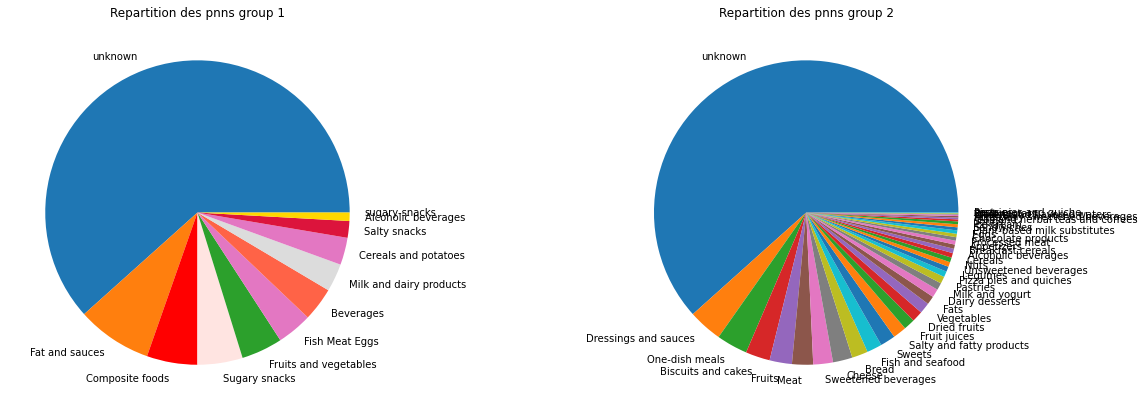

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'}, figsize=(20,7))

xplotincoun = colpnn1
yplotincoun = data_0['pnns_groups_1'].value_counts().to_list()

xplotincodeux = colpnn2
yplotincodeux = data_0['pnns_groups_2'].value_counts().to_list()

coul = ['#1f77b4', 'C1', 'red', 'mistyrose', 'C2', 'C6', 'tomato', 'gainsboro', 'm', 'crimson', 'gold', 'papayawhip']

ax1.pie(yplotincoun, labels = xplotincoun, colors=coul)
ax1.set(title='Repartition des pnns group 1')

ax2.pie(yplotincodeux, labels = xplotincodeux)
ax2.set(title='Repartition des pnns group 2')

plt.show()

In [39]:
#list(data_0)

#### colonnes qui m'intéressent
#### on garde energy_100g car elle a le moins de données manquantes (20% contre 93% pour energy-kj_100g et 23% pour energy-kcal_100g )
#### Je ne sélectionne qu'une colonne sur 2 pour les catégoris identiques (ex : salt_100g et sodium_100g)

In [40]:
data_0 = data_0[['code', 'product_name', 'ingredients_text', 'additives_n', 'additives_tags', 'additives_en',
                 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
                 'ecoscore_score_fr', 'ecoscore_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
                 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']]

In [41]:
print("dimension :", data_0.shape)
print("---"*10)
print("nombre de données dupliquées :", data_0.duplicated().sum())
print("---"*10)
print('% de données manquantes')
print(data_0.isna().sum()*100/data_0.shape[0])
print("---"*10)

dimension : (1918228, 21)
------------------------------
nombre de données dupliquées : 22
------------------------------
% de données manquantes
code                   0.000000
product_name           4.169265
ingredients_text      63.014146
additives_n           63.014094
additives_tags        78.625534
additives_en          78.625534
nutriscore_score      63.431667
nutriscore_grade      63.431667
nova_group            67.690389
pnns_groups_1          0.026274
pnns_groups_2          0.026170
ecoscore_score_fr     75.871116
ecoscore_grade_fr     75.871116
energy_100g           20.563353
fat_100g              20.976703
saturated-fat_100g    23.210275
carbohydrates_100g    20.998286
sugars_100g           21.824621
fiber_100g            74.775887
proteins_100g         20.913729
salt_100g             24.773228
dtype: float64
------------------------------


#### filtrage par éco score != isna(), car c'est le groupe le plus difficile à "reproduire" avec la base de donnée

In [42]:
startpd = time.time()
data_0 = data_0.dropna(subset=['ecoscore_grade_fr']).reset_index(drop=True)
endcon = time.time()
print("total time: ",(endcon - startpd),"sec")
print(data_0.shape)

total time:  0.42824625968933105 sec
(462847, 21)


In [43]:
print("dimension :", data_0.shape)
print("---"*10)
print("nombre de données dupliquées :", data_0.duplicated().sum())
print("---"*10)
print('% de données manquantes')
print(data_0.isna().sum()*100/data_0.shape[0])
print("---"*10)

dimension : (462847, 21)
------------------------------
nombre de données dupliquées : 3
------------------------------
% de données manquantes
code                   0.000000
product_name           0.725942
ingredients_text      45.071698
additives_n           45.071482
additives_tags        71.674009
additives_en          71.674009
nutriscore_score      22.651978
nutriscore_grade      22.651978
nova_group            49.852327
pnns_groups_1          0.000000
pnns_groups_2          0.000000
ecoscore_score_fr      0.000000
ecoscore_grade_fr      0.000000
energy_100g           15.015113
fat_100g              15.299440
saturated-fat_100g    16.818301
carbohydrates_100g    15.357559
sugars_100g           16.347519
fiber_100g            65.960026
proteins_100g         15.245211
salt_100g             16.701199
dtype: float64
------------------------------


In [44]:
data_0.head()

,code,product_name,ingredients_text,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,100,moutarde au moût de raisin,eau graines de téguments d...,0.0,NaN,NaN,18.0,d,NaN,Fat and sauces,Dressings and sauces,55.0,c,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,949,Salade de carottes râpées,NaN,NaN,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,78.0,b,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42
2,1885,Compote de poire,NaN,NaN,NaN,NaN,-2.0,a,NaN,Fruits and vegetables,Fruits,76.0,b,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
3,2103,Aiguillettes de poulet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fish Meat Eggs,Meat,24.0,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2257,Salade de macedoine de lég...,NaN,NaN,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,69.0,b,598.0,12.7,1.0,3.9,1.0,NaN,1.9,0.27


#### check if we still have enough different categories !

In [45]:
colnov = data_0['nova_group'].unique()
print(len(colnov))
print('colnov :', colnov)
print('--'*10)
colpnn1 = data_0['pnns_groups_1'].dropna().unique()
print(len(colpnn1))
#print('colpnn1 :', colpnn1)
print('--'*10)
colpnn2 = data_0['pnns_groups_2'].dropna().unique()
print(len(colpnn2))
#print('colpnn2 :', colpnn2)
print('--'*10)

5
colnov : [nan  4.  1.  3.  2.]
--------------------
11
--------------------
39
--------------------


In [46]:
effectifs3 = data_0['pnns_groups_1'].value_counts()

modalites3 = effectifs3.index # l'index de effectifs contient les modalités

tab3 = pd.DataFrame(modalites3, columns = ['pnns_groups_1']) # création du tableau à partir des modalités

tab3["n_filtrés"] = effectifs3.values
tab3["f_filtrés"] = tab3["n_filtrés"] / len(data_0) # len(data) renvoie la taille de l'échantillon

tab3 = tab3.sort_values('pnns_groups_1') # tri des valeurs de la variable X (croissant)
tab3["F"] = tab3["f_filtrés"].cumsum() # cumsum calcule la somme cumulée

tab3

,pnns_groups_1,n_filtrés,f_filtrés,F
10,Alcoholic beverages,13591,0.029364,0.029364
8,Beverages,23376,0.050505,0.079869
3,Cereals and potatoes,43985,0.095031,0.174900
9,Composite foods,21630,0.046733,0.221633
4,Fat and sauces,37372,0.080744,0.302376
2,Fish Meat Eggs,67140,0.145059,0.447435
5,Fruits and vegetables,31006,0.066990,0.514425
1,Milk and dairy products,77362,0.167144,0.681569
6,Salty snacks,28531,0.061642,0.743211
0,Sugary snacks,94136,0.203385,0.946596


In [47]:
# jointure à gauche
# les 2 clés sont Indicator Code pour 3 et Series Code pour 5
tab13 = tab1.merge(tab3[['pnns_groups_1','n_filtrés', 'f_filtrés']], left_on='pnns_groups_1',
                      right_on='pnns_groups_1',
                      how = 'left')
tab13

,pnns_groups_1,n,f,F,n_filtrés,f_filtrés
0,Alcoholic beverages,17040,0.008883,0.008883,13591.0,0.029364
1,Beverages,68447,0.035682,0.044566,23376.0,0.050505
2,Cereals and potatoes,83804,0.043688,0.088254,43985.0,0.095031
3,Composite foods,55513,0.028940,0.117194,21630.0,0.046733
4,Fat and sauces,71737,0.037398,0.154591,37372.0,0.080744
5,Fish Meat Eggs,102955,0.053672,0.208263,67140.0,0.145059
6,Fruits and vegetables,56971,0.029700,0.237963,31006.0,0.066990
7,Milk and dairy products,92067,0.047996,0.285959,77362.0,0.167144
8,Salty snacks,33976,0.017712,0.303671,28531.0,0.061642
9,Sugary snacks,153243,0.079888,0.383559,94136.0,0.203385


In [48]:
tabshow = tab13.drop(['f', 'F', 'f_filtrés'], axis=1)
tabshow

,pnns_groups_1,n,n_filtrés
0,Alcoholic beverages,17040,13591.0
1,Beverages,68447,23376.0
2,Cereals and potatoes,83804,43985.0
3,Composite foods,55513,21630.0
4,Fat and sauces,71737,37372.0
5,Fish Meat Eggs,102955,67140.0
6,Fruits and vegetables,56971,31006.0
7,Milk and dairy products,92067,77362.0
8,Salty snacks,33976,28531.0
9,Sugary snacks,153243,94136.0


In [49]:
effectifs4 = data_0['pnns_groups_2'].value_counts()

modalites4 = effectifs4.index

tab4 = pd.DataFrame(modalites4, columns = ['pnns_groups_2'])

tab4["n_filtrés"] = effectifs4.values
tab4["f_filtrés"] = tab4["n_filtrés"] / len(data_0)

tab4 = tab4.sort_values('pnns_groups_2')
tab4["F"] = tab4["f_filtrés"].cumsum()

tab4

,pnns_groups_2,n_filtrés,f_filtrés,F
13,Alcoholic beverages,13591,0.029364,0.029364
18,Appetizers,9345,0.020190,0.049554
37,Artificially sweetened bev...,873,0.001886,0.051440
1,Biscuits and cakes,41106,0.088811,0.140252
20,Bread,8894,0.019216,0.159467
17,Breakfast cereals,9592,0.020724,0.180191
10,Cereals,15656,0.033825,0.214017
0,Cheese,45464,0.098227,0.312244
15,Chocolate products,11231,0.024265,0.336509
26,Dairy desserts,4611,0.009962,0.346471


In [50]:
# jointure à gauche
# les 2 clés sont Indicator Code pour 3 et Series Code pour 5
tab24 = tab2.merge(tab4[['pnns_groups_2','n_filtrés', 'f_filtrés']], left_on='pnns_groups_2',
                      right_on='pnns_groups_2',
                      how = 'left')
tab24

,pnns_groups_2,n,f,F,n_filtrés,f_filtrés
0,Alcoholic beverages,17042,8.884241e-03,0.008884,13591.0,0.029364
1,Appetizers,11619,6.057153e-03,0.014941,9345.0,0.020190
2,Artificially sweetened bev...,9378,4.888887e-03,0.019830,873.0,0.001886
3,Biscuits and cakes,63295,3.299660e-02,0.052827,41106.0,0.088811
4,Bread,22135,1.153930e-02,0.064366,8894.0,0.019216
5,Breakfast cereals,9593,5.000970e-03,0.069367,9592.0,0.020724
6,Cereals,40121,2.091566e-02,0.090283,15656.0,0.033825
7,Cheese,45474,2.370625e-02,0.113989,45464.0,0.098227
8,Chocolate products,14514,7.566358e-03,0.121555,11231.0,0.024265
9,Dairy desserts,6860,3.576217e-03,0.125132,4611.0,0.009962


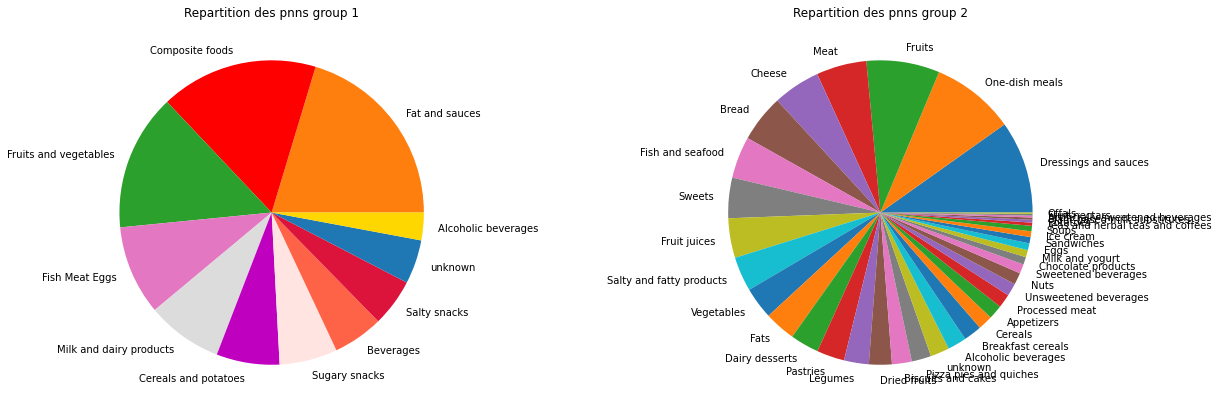

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'}, figsize=(20,7))

xplotincoun = colpnn1
yplotincoun = data_0['pnns_groups_1'].value_counts().to_list()

xplotincodeux = colpnn2
yplotincodeux = data_0['pnns_groups_2'].value_counts().to_list()

coul = ['C1', 'red', 'C2', 'C6', 'gainsboro', 'm', 'mistyrose', 'tomato', 'crimson', '#1f77b4', 'gold', 'papayawhip', 'gainsboro', 'gold', '#1f77b4',]

ax1.pie(yplotincoun, labels = xplotincoun, colors=coul)
ax1.set(title='Repartition des pnns group 1')

ax2.pie(yplotincodeux, labels = xplotincodeux)
ax2.set(title='Repartition des pnns group 2')

plt.show()

#### On peut considérer qu'on en a encore assez, on a perdu beaucoup d'éléments de la catégorie unknown

## Filtrage des valeurs abérrantes

In [59]:
data_0.describe()

,additives_n,nutriscore_score,nova_group,ecoscore_score_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,254235.000000,358003.000000,232107.000000,462847.000000,3.933500e+05,392034.000000,385004.000000,391765.000000,387183.000000,157553.000000,392285.000000,385546.000000
mean,1.558617,9.429628,3.268523,43.889231,1.237708e+03,16.549150,6.236782,25.947187,12.783209,2.788233,9.251966,1.402882
std,2.394224,8.737281,1.019288,25.924250,1.316401e+04,52.689936,9.367534,308.060986,47.552619,5.493744,116.960548,29.006403
min,0.000000,-15.000000,1.000000,-28.000000,0.000000e+00,0.000000,0.000000,-0.500000,-1.000000,-20.000000,-8.330000,0.000000
25%,0.000000,2.000000,3.000000,27.000000,4.810000e+02,1.200000,0.300000,1.800000,0.500000,0.000000,1.700000,0.075000
50%,1.000000,11.000000,4.000000,38.000000,1.151000e+03,9.830000,2.500000,11.200000,3.200000,1.500000,6.400000,0.590000
75%,2.000000,16.000000,4.000000,65.000000,1.724000e+03,25.000000,10.000000,51.000000,17.000000,3.600000,14.000000,1.400000
max,38.000000,40.000000,4.000000,125.000000,8.010000e+06,29000.000000,2000.000000,192000.000000,27000.000000,900.000000,73000.000000,14000.000000


#### filtrage sur l'énergie par aliment
1 g de protéine = 4 kcal / 1 g de glucide = 4 kcal / <br>
1 g de lipide = 9 kcal / 1 g d éthanol(alcool) = 7 kcal

Le maximum de calorie par aliment est de 900 kcal = 900 000 calories = 3768.12 kJ = 3 768 120 J <br>
Attention la catégorie energy_100g est en kilo joule

In [60]:
def energy(df, name, value) :
    #df, 'energy_100g', 3768.12

    data_clean_energy = df.loc[df[name] > value].index.tolist()
    df = df.drop(data_clean_energy).reset_index(drop=True)

    return df

In [61]:
print(data_0.shape)
print('--'*10)

data_0 = energy(data_0, 'energy_100g', 3768.12)

print(data_0.shape)

(462847, 21)
--------------------
(461943, 21)


#### filtrage > 100 g et < 0 g par colonne

In [62]:
def ecremage(df, firstcol, lastcol) :
    datclean = []
    tabout = df.loc[:, firstcol:lastcol]
    print(tabout.shape[1])
    for i in range(tabout.shape[1]) :
        df[df[list(tabout)[3]] > 100]
        datclean.append(df[df[list(tabout)[i]] > 100].index.tolist())
        datclean.append(df[df[list(tabout)[i]] < 0].index.tolist())
        print(list(tabout)[i], 'len', len(datclean[i]))
        print(datclean[i])
        print('--'*10)
    print(datclean)
    for i in range(len(datclean)) :
        df = df.drop(index=datclean[i], errors='ignore')
    
    df = df.reset_index(drop=True)
    
    #print('data_clean :', df.shape)
        
    return df

In [63]:
print(data_0.shape)
print('--'*10)

data_0 = ecremage(data_0, 'fat_100g', 'salt_100g')

print(data_0.shape)

(461943, 21)
--------------------
7
fat_100g len 8
[572, 20251, 24093, 29567, 83792, 347860, 379156, 380711]
--------------------
saturated-fat_100g len 0
[]
--------------------
carbohydrates_100g len 4
[20251, 24093, 147215, 171516]
--------------------
sugars_100g len 0
[]
--------------------
fiber_100g len 28
[572, 10182, 12045, 31079, 44115, 75514, 75727, 87843, 118250, 204786, 297305, 314267, 317594, 319800, 333464, 335462, 342029, 347860, 352875, 361169, 366628, 376942, 377050, 380711, 386826, 403095, 454899, 460730]
--------------------
proteins_100g len 1
[131137]
--------------------
salt_100g len 7
[12045, 326324, 347860, 361169, 365052, 365691, 366470]
--------------------
[[572, 20251, 24093, 29567, 83792, 347860, 379156, 380711], [], [20251, 24093, 147215, 171516], [], [572, 10182, 12045, 31079, 44115, 75514, 75727, 87843, 118250, 204786, 297305, 314267, 317594, 319800, 333464, 335462, 342029, 347860, 352875, 361169, 366628, 376942, 377050, 380711, 386826, 403095, 454899

In [64]:
data_0.describe()

,additives_n,nutriscore_score,nova_group,ecoscore_score_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,253802.000000,357092.000000,231755.000000,461735.000000,392246.000000,390941.000000,383944.000000,390688.000000,386158.000000,157200.000000,391201.000000,384507.000000
mean,1.558609,9.408262,3.268452,43.904794,1200.523520,16.417012,6.215290,25.430534,12.709567,2.767486,9.049496,1.107106
std,2.394116,8.730027,1.019408,25.923074,825.692863,20.195643,8.241423,27.993680,19.435987,4.473640,8.947034,3.689872
min,0.000000,-15.000000,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,27.000000,481.000000,1.200000,0.300000,1.800000,0.500000,0.000000,1.700000,0.075000
50%,1.000000,11.000000,4.000000,38.000000,1146.000000,9.800000,2.500000,11.200000,3.200000,1.500000,6.400000,0.583000
75%,2.000000,16.000000,4.000000,65.000000,1715.000000,25.000000,10.000000,51.000000,17.000000,3.600000,14.000000,1.390000
max,38.000000,40.000000,4.000000,125.000000,3768.120000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### filtering total (glucides + gras + proteines + sel ) > 100g

In [65]:
def summ(df, columns) :

    datclean = []
    for i in range(df.shape[0]) :
        if df.loc[i, columns].sum() > 100 :
            datclean.append(i)

    df = df.drop(index=datclean).reset_index(drop=True)
                        
    return df

In [66]:
select = ['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

startti = time.time()

data_0 = summ(data_0, select)

finti = time.time()
print("total time: ",(finti-startti),"sec")
print("--"*10)
print(data_0.shape)

total time:  373.81882977485657 sec
--------------------
(452727, 21)


# PARTIE 4 : Exportation de la base de donnée nettoyée

In [67]:
print("dimension :", data_0.shape)
print("---"*10)
print("nombre de données dupliquées :", data_0.duplicated().sum())
print("---"*10)
print('% de données manquantes')
print(data_0.isna().sum()*100/data_0.shape[0])
print("---"*10)

dimension : (452727, 21)
------------------------------
nombre de données dupliquées : 3
------------------------------
% de données manquantes
code                   0.000000
product_name           0.733555
ingredients_text      45.680068
additives_n           45.679847
additives_tags        72.050485
additives_en          72.050485
nutriscore_score      23.007905
nutriscore_grade      23.007905
nova_group            50.430171
pnns_groups_1          0.000000
pnns_groups_2          0.000000
ecoscore_score_fr      0.000000
ecoscore_grade_fr      0.000000
energy_100g           15.339266
fat_100g              15.635250
saturated-fat_100g    17.146095
carbohydrates_100g    15.692238
sugars_100g           16.669649
fiber_100g            67.034880
proteins_100g         15.576274
salt_100g             17.040071
dtype: float64
------------------------------


In [68]:
data_0 = data_0.drop_duplicates().reset_index(drop=True)
data_0.shape

(452724, 21)

In [69]:
data_0.describe()

,additives_n,nutriscore_score,nova_group,ecoscore_score_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,245922.000000,348561.000000,224416.000000,452724.000000,383279.000000,381939.000000,375099.000000,381681.000000,377256.000000,149242.000000,382206.000000,375579.000000
mean,1.552805,9.329805,3.264455,44.013059,1179.527465,16.108501,6.167936,24.721317,12.521472,2.496033,9.008582,1.085368
std,2.396517,8.706911,1.021994,25.978622,819.169902,20.061910,8.233865,27.682491,19.323663,3.923927,8.927728,3.497364
min,0.000000,-15.000000,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,27.000000,469.000000,1.100000,0.210000,1.700000,0.500000,0.000000,1.640000,0.070000
50%,1.000000,10.000000,4.000000,38.000000,1113.000000,9.400000,2.400000,11.000000,3.100000,1.300000,6.300000,0.580000
75%,2.000000,16.000000,4.000000,65.000000,1678.000000,25.000000,10.000000,50.000000,16.200000,3.400000,14.000000,1.400000
max,38.000000,40.000000,4.000000,125.000000,3768.120000,100.000000,100.000000,100.000000,100.000000,90.400000,100.000000,100.000000


In [ ]:
#data_0.to_csv('data_clean.csv')